# Classification of Daily Expenses<n>
Author: Maria Kasznar (https://www.linkedin.com/in/biakasznar/) <br>
Date: June 2025


***

This machine learning project implements a multiclass classification pipeline to automatically categorize personal expense data collected during a year-long stay in Australia (July 2022 - July 2023), leveraging labels from two distinct cities. The model is specifically designed for transferability and reusability, with a key focus on accurately classifying expenses from a third, previously unlabeled city.

While the core database has been translated into English for broader accessibility, the 'Description' column remains in Portuguese due to the complexity of automated translation for nuanced free-text entries. 

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.options.mode.chained_assignment = None

path = r'C:\Users\biaka\OneDrive\Documents\JupyterNotebooks\ExpensesClassification\data'
file_name = r'DailyExpenses_PythonProject.xlsx'

df = pd.read_excel(os.path.join(path, file_name))

In [2]:
list(df.columns)

['Date',
 'Cash Flow',
 'Description',
 'Category',
 'City',
 'Payer',
 'Mode of Payment',
 'Amount']

* **'Cash Flow'**: "C" for Credit (income), "D" for Debit (expense). Only expenses will be considered in this project, meaning the dataset will be filtered to include only "D" transactions.
* **'Description'**: A free-text field providing specific details about the transaction (Note: This column is in Portuguese, as previously discussed).
* **'Category'**: The classification or type of the expense (e.g., Food, Transport, Rent), serving as the target variable for your multiclass classification model.
* **'City'**: The geographical location where the transaction took place. For this project, __data from Brisbane and Perth is labeled__, while data from __Jabiru is the target__ for classification by the trained model.

The remaining columns, i.e. Date, Payer, Mode of Payment, and Amount, have straightforward names clearly indicating their respective data points.

### Data Cleaning

In [3]:
df_expenses = df[df['Cash Flow'] == 'D']

In [4]:
df_jabiru = df_expenses[df_expenses['City'] == 'Jabiru']
df_expenses.drop(df_expenses[(df_expenses['City'] != 'Brisbane') & (df_expenses['City'] != 'Perth')].index, inplace=True)

In [5]:
df_expenses.shape

(564, 8)

In [6]:
df_expenses.describe()

,Date,Amount
count,564,564.000000
mean,2023-02-17 00:35:44.680850944,71.253333
min,2022-10-03 00:00:00,1.000000
25%,2022-12-17 00:00:00,10.000000
50%,2023-02-05 12:00:00,24.450000
75%,2023-04-08 06:00:00,44.100000
max,2023-07-13 00:00:00,4200.000000
std,NaN,266.601877


In [7]:
df_expenses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 82 to 872
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             564 non-null    datetime64[ns]
 1   Cash Flow        564 non-null    object        
 2   Description      564 non-null    object        
 3   Category         551 non-null    object        
 4   City             564 non-null    object        
 5   Payer            564 non-null    object        
 6   Mode of Payment  564 non-null    object        
 7   Amount           564 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 39.7+ KB


__Category has 13 missing values.__ <br>
All other columns seem okay.

In [8]:
df_expenses[df_expenses.Category.isnull()]

,Date,Cash Flow,Description,Category,City,Payer,Mode of Payment,Amount
215,2022-11-27,D,Saque - Carro,NaN,Brisbane,Bruno,NAB,2000.00
216,2022-11-27,D,Pagamento - Carro & Mecânico,NaN,Brisbane,Bruno,NAB,1550.00
217,2022-11-27,D,Saque - Carro,NaN,Brisbane,Bia,NAB,2000.00
226,2022-12-01,D,Saque - BQL,NaN,Brisbane,Bruno,NAB,250.00
231,2022-12-02,D,Transferência do carro,NaN,Brisbane,Bruno,Wise,60.80
247,2022-12-05,D,Transferência,NaN,Brisbane,Bia,NAB,969.06
323,2022-12-27,D,Rego,NaN,Brisbane,Bruno,NAB,399.20
481,2023-02-15,D,Saque - Revisão do carro,NaN,Brisbane,Bruno,NAB,120.00
541,2023-02-27,D,Troca de Pneus & Realinhamento,NaN,Brisbane,Bruno,NAB,529.00
544,2023-02-27,D,Transferência,NaN,Brisbane,Bruno,NAB,537.76


These expenses can be divided into 3 groups: withdrawals, transfers and occasional payments. None of them are part of the scope of the project.<br>Withdrawals and transfers are not expenses; they were recorded for track of cash flow.
*Occasional* expenses are not *daily*.<br>
Therefore, __all these rows will de deleted.__ 

In [9]:
df_expenses.dropna(subset = ['Category'], inplace=True)

In [10]:
#Unique values in relevant columns

for i in [3, 4, 5, 6]:
    print(df_expenses[list(df.columns)[i]].value_counts(), "\n\n")

Category
Restaurant                 193
Supermarket                103
Transport                   55
Gas                         50
Leisure Activity            44
Health Insurance            34
Misc                        27
Rent & Bills                19
Clothes                     11
Certificates & Licenses      6
Subscription                 6
-                            2
Trips                        1
Name: count, dtype: int64 


City
Brisbane    349
Perth       202
Name: count, dtype: int64 


Payer
Bruno    291
Bia      260
Name: count, dtype: int64 


Mode of Payment
NAB     497
Wise     54
Name: count, dtype: int64 




In [11]:
df_expenses[df_expenses.Category.isin(['-'])]

,Date,Cash Flow,Description,Category,City,Payer,Mode of Payment,Amount
82,2022-10-03,D,Passagens para Brisbane,-,Brisbane,Bruno,Wise,696.29
144,2022-11-09,D,Transferência,-,Brisbane,Bruno,NAB,1988.22


Once again, these rows fall under the undesired categories afore mentioned, and will be deleted.<br>
The first one is an occasional expense, while the second is a money transfer.<br>
Also, the category "Trips" will be excluded from further analysis due to an insufficient number of data points.

In [12]:
df_expenses.drop(df_expenses[df_expenses.Category.isin(['-', 'Trips'])].index, inplace = True)

In [13]:
categories = list(df_expenses.Category.unique())

In [14]:
df_expenses.reset_index(drop=True, inplace=True)

### Exploratory Data Analysis (EDA)

In [15]:
df_expenses.sort_values('Amount', ascending=False).head(10)

,Date,Cash Flow,Description,Category,City,Payer,Mode of Payment,Amount
4,2022-11-08,D,Aluguel,Rent & Bills,Brisbane,Bia,NAB,4200.00
0,2022-10-19,D,Aluguel,Rent & Bills,Brisbane,Bia,NAB,2100.00
545,2023-07-10,D,Pack & Send,Misc,Perth,Bia,NAB,487.97
496,2023-06-13,D,Aluguel,Rent & Bills,Perth,Bruno,NAB,300.00
349,2023-03-14,D,Aluguel,Rent & Bills,Perth,Bruno,NAB,300.00
366,2023-03-21,D,Aluguel,Rent & Bills,Perth,Bruno,NAB,300.00
379,2023-03-28,D,Aluguel,Rent & Bills,Perth,Bruno,NAB,300.00
412,2023-04-11,D,Aluguel,Rent & Bills,Perth,Bruno,NAB,300.00
420,2023-04-18,D,Aluguel,Rent & Bills,Perth,Bruno,NAB,300.00
432,2023-04-25,D,Aluguel,Rent & Bills,Perth,Bruno,NAB,300.00


In [16]:
df_expenses.sort_values('Amount', ascending=False).tail(10)

,Date,Cash Flow,Description,Category,City,Payer,Mode of Payment,Amount
128,2022-12-17,D,Park Meter,Transport,Brisbane,Bruno,NAB,2.90
424,2023-04-20,D,Car park,Transport,Perth,Bia,NAB,2.75
292,2023-02-15,D,Woolies - Cookies,Supermarket,Brisbane,Bia,NAB,2.50
118,2022-12-14,D,Hungry Jacks,Restaurant,Brisbane,Bruno,NAB,2.50
148,2022-12-24,D,Hungry Jacks,Restaurant,Brisbane,Bruno,NAB,2.50
543,2023-07-09,D,Macca's Spearwood,Restaurant,Perth,Bia,NAB,2.00
391,2023-04-03,D,Foodland IGA Freo,Supermarket,Perth,Bia,NAB,2.00
134,2022-12-18,D,Park Meter,Transport,Brisbane,Bruno,NAB,1.75
527,2023-07-03,D,Woolies,Supermarket,Perth,Bruno,NAB,1.65
137,2022-12-18,D,McDonald's - Raspadinha,Restaurant,Brisbane,Bia,NAB,1.00


In [17]:
df_eda = df_expenses[df_expenses.Amount <= 500]

There are two identified outliers, originating from the Rent & Bills category. These instances are factually correct - the total amount for 3 months worth of rent was paid in 2 installments. They will be excluded from subsequent graphical representations to prevent distortion, while remaining in the underlying dataset for analytical integrity.
***

In [18]:
box_order = df_eda[['Category', 'Amount']].groupby('Category').std().sort_values('Amount', ascending=False).iloc[::1].index

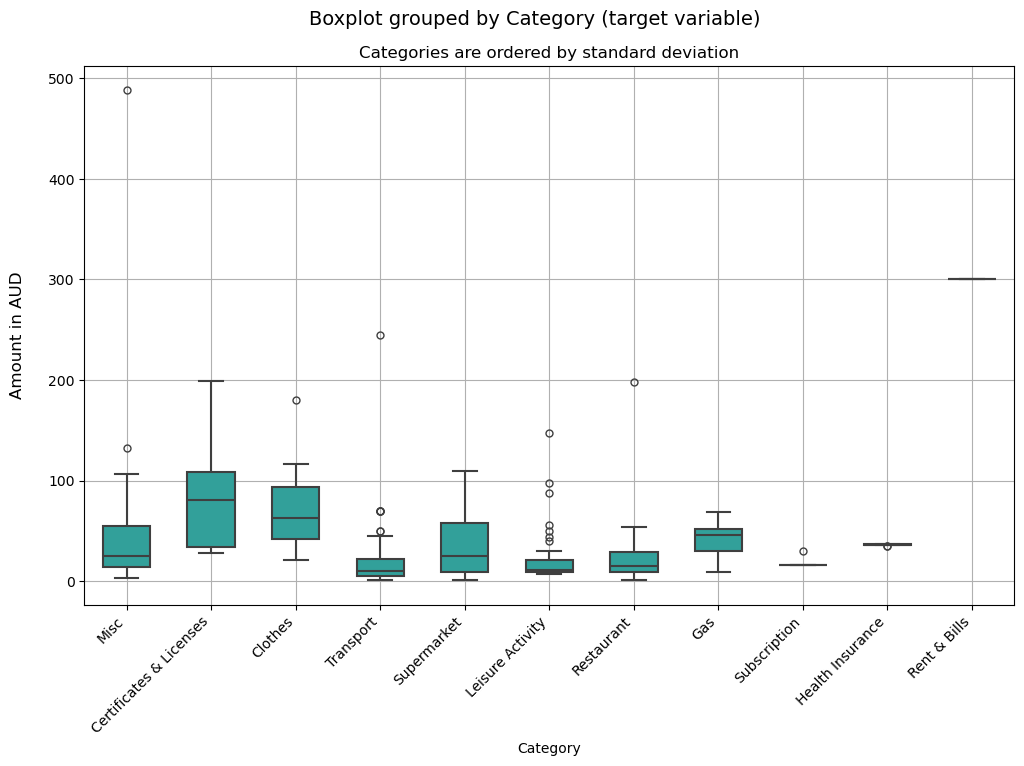

In [19]:
fig, ax = plt.subplots(figsize=(12, 7))
boxplot = sns.boxplot(y='Amount', x='Category', data=df_eda, order=box_order, 
                      gap=0.3, color='lightseagreen', fliersize=5, linewidth=1.5)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.suptitle(t='Boxplot grouped by Category (target variable)', fontsize=14, y=0.96)
plt.title('Categories are ordered by standard deviation', fontsize=12)
plt.ylabel('Amount in AUD\n', fontsize=12)
plt.grid()
plt.show()

In [20]:
df_eda[['Category', 'Amount']].groupby('Category').describe().sort_values(('Amount', 'std'), ascending=False)

Amount                                           \
                         count        mean        std     min       25%   
Category                                                                  
Misc                      27.0   53.021852  92.421856    3.00   14.5000   
Certificates & Licenses    6.0   87.506667  65.867656   28.02   34.0150   
Clothes                   11.0   73.625455  46.855489   20.75   42.4500   
Transport                 55.0   21.300909  36.178831    1.75    5.0000   
Supermarket              103.0   35.123010  30.583880    1.65    9.5500   
Leisure Activity          44.0   22.606818  27.680220    7.30    9.0000   
Restaurant               193.0   20.394560  18.276039    1.00    8.9500   
Gas                       50.0   40.069400  15.749518    9.45   30.0225   
Subscription               6.0   18.331667   5.711394   16.00   16.0000   
Health Insurance          34.0   36.512353   0.337971   35.23   36.5300   
Rent & Bills              17.0  300.000000   0.000000  300.00  300.0000   

                                                  
                            50%      75%     max  
Category                                          
Misc                      25.40   55.025  487.97  
Certificates & Licenses   80.50  109.000  199.00  
Clothes                   63.00   93.475  179.99  
Transport                 10.00   22.545  244.99  
Supermarket               25.16   57.660  109.42  
Leisure Activity          11.25   21.000  147.20  
Restaurant                15.00   28.810  198.00  
Gas                       46.05   52.275   68.89  
Subscription              16.00   16.000   29.99  
Health Insurance          36.53   36.730   36.73  
Rent & Bills             300.00  300.000  300.00

In [21]:
df_eda[df_eda.Category == 'Transport'].sort_values('Amount')

,Date,Cash Flow,Description,Category,City,Payer,Mode of Payment,Amount
134,2022-12-18,D,Park Meter,Transport,Brisbane,Bruno,NAB,1.75
424,2023-04-20,D,Car park,Transport,Perth,Bia,NAB,2.75
128,2022-12-17,D,Park Meter,Transport,Brisbane,Bruno,NAB,2.90
82,2022-12-03,D,Park Meter,Transport,Brisbane,Bruno,NAB,4.27
186,2023-01-06,D,Car park,Transport,Brisbane,Bruno,NAB,4.99
249,2023-01-28,D,Car park,Transport,Brisbane,Bruno,NAB,5.00
243,2023-01-27,D,Car park,Transport,Brisbane,Bruno,NAB,5.00
282,2023-02-11,D,Car park,Transport,Brisbane,Bruno,NAB,5.00
301,2023-02-18,D,Car park,Transport,Brisbane,Bruno,NAB,5.00
308,2023-02-20,D,Car Park,Transport,Brisbane,Bruno,NAB,5.00


#### Key Insights from Categories:

- __Most Consistent Spending:__ "Rent & Bills," "Health Insurance," and "Subscription" show highly predictable and consistent spending, which matches their recurring nature. All 3 have clearly distinct means, so it should be easy to properly classify them.
- __Highly Variable Spending (with Outliers):__ "Misc," "Leisure Activity," and "Transport" exhibit significant variability and a presence of high-value outliers, where a few transactions are much larger than the typical amount. This behaviour was expected for "Misc" because, as the name suggest, it gathers expenses that have no clear tie to each other. For "Transport", a closer look (table above) shows that there are 2 distinctive groups inside it: parking expenses (park meters and car parks), and public transport expenses (top-up of GoCard, Translink). The first one roughly ranges from \\$1.75 to \\$5, while the second goes from \\$10 to \\$70. Splitting the current "Transport" category into 2 could benefit the classification model.  
***

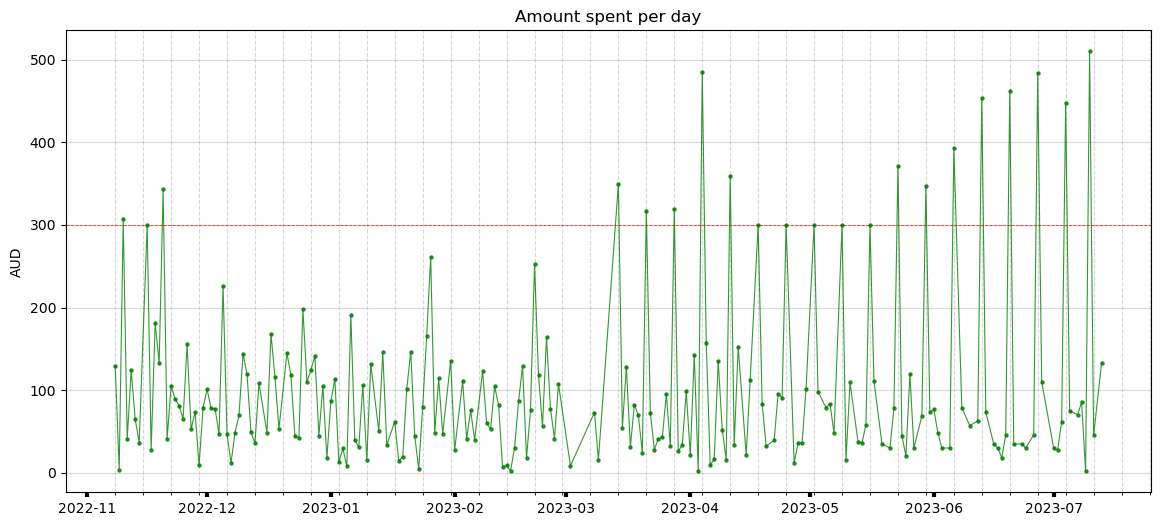

In [22]:
import matplotlib.dates as mdates

df_gb_day = df_eda.groupby('Date').Amount.sum()
df_gb_day = df_gb_day.to_frame()
df_gb_day['day_of_week'] = df_gb_day.index.weekday

fig = plt.figure(figsize=(14,6))
ax = fig.gca()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=1))
date_format = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_format)

plt.title('Amount spent per day')
plt.ylabel('AUD')

plt.axhline(y=300, color='r', linestyle='--', linewidth=0.6, alpha=0.5)
plt.axhline(y=300, color='r', linestyle='--', linewidth=0.6, alpha=0.5)

plt.plot(df_gb_day.index, df_gb_day.Amount, '-go', linewidth=0.8, markersize=2.2, alpha=0.8)
ax.yaxis.grid(True, alpha=0.5)
ax.xaxis.grid(which='minor', linestyle='--', alpha=0.5)
ax.xaxis.set_tick_params(width=3)

plt.show()

#### Key Insights from Date:

From roughly mid-March onwards, there's a very distinct weekly pattern. For a while in April and May, it was consistently hitting a value around 300, which could suggest a regular, fixed expense (like a weekly rent). 
Further investigation is recommended to identify categories exhibiting a seasonal component. From this primary analysis, the weekday appears to be a promising feature for inclusion in the model's input.

***

In [23]:
df_gb_date = df_eda[['Category', 'Date']].groupby(['Category', df_eda.Date.dt.weekday]).agg(['count','nunique'])
df_gb_date.columns = df_gb_date.columns.get_level_values(1)

df_gb_amount = df_eda[['Category', 'Date', 'Amount']].groupby(['Category', df_eda.Date.dt.weekday]).Amount.agg(['sum', 'mean','median'])

df_gb = pd.concat([df_gb_date, df_gb_amount], axis=1)
df_gb['average_amount_per_day'] = df_gb['sum'] / df_gb['nunique']

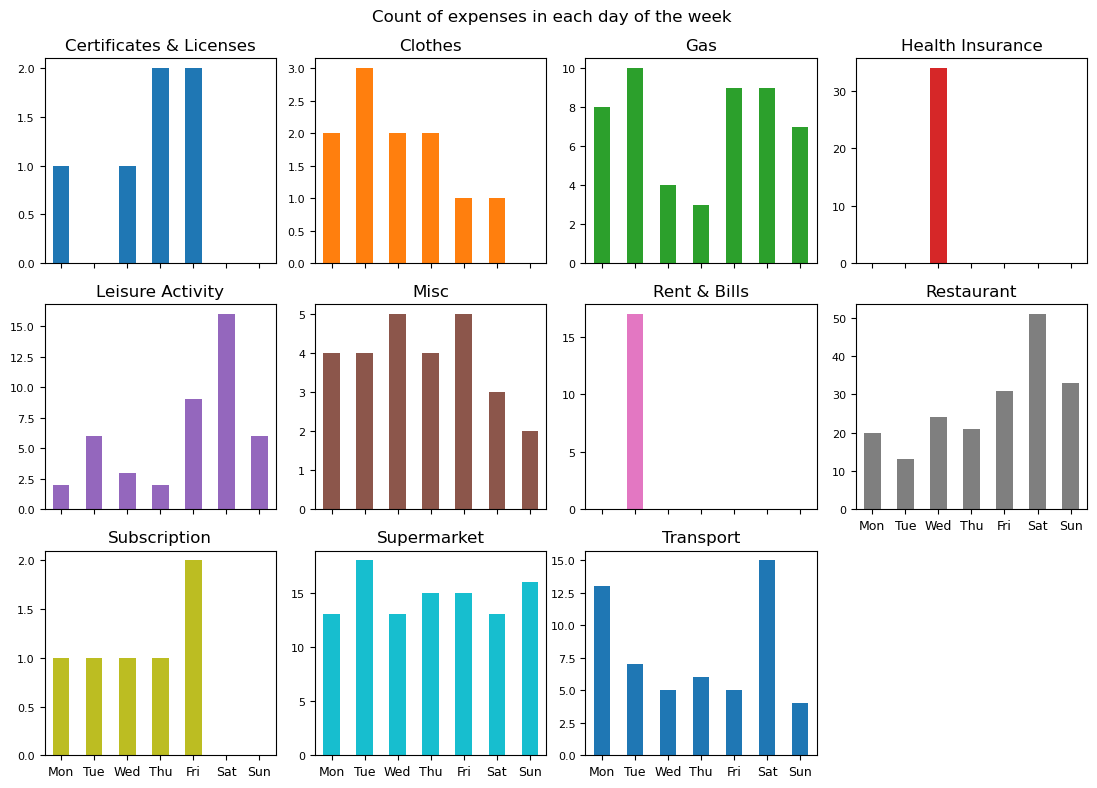

In [24]:
subp = df_gb['count'].unstack(level=0).plot( kind='bar',
                                      subplots=True,
                                      figsize=(11, 8), 
                                      layout=(3,4), 
                                      legend=False,
                                      sharex=True,
                                      fontsize=8, 
                                      title='Count of expenses in each day of the week',
                                      xlabel=''
                                    )


for subplot in subp.flatten():
    subplot.set_xticks(range(0, 7))
    subplot.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0, fontsize=9, ha='center')

plt.tight_layout()
plt.show()

#### Key Insights from day of week from Date:

- __Recurring Payments:__ "Health Insurance" and "Rent & Bills" demonstrate extremely strong single-day patterns, indicative of automated or scheduled recurring payments. This explains the previously identified behaviour.
- __Weekend vs. Weekday Spending:__ Categories like "Leisure Activity" and "Restaurant" clearly show a strong skew towards Friday & weekend spending, which is intuitive.

Both day of the week and weekday/weekend provide valuable information and can be used as inputs for the model.
***

In [42]:
percentage_payer = df_eda.groupby('Payer')['Amount'].count() / df_eda.shape[0]
for p in range(len(percentage_payer)):
    print("\033[1m", "Percentage of payments made by", percentage_payer.index[p], ":", format(percentage_payer.iloc[p], ".2%"), "\033[0m")

 Percentage of payments made by Bia : 47.07% 
 Percentage of payments made by Bruno : 52.93% 


In [43]:
palette = dict(zip(percentage_payer.index, sns.color_palette(palette="blend:#5A9,#A56", n_colors=2)))

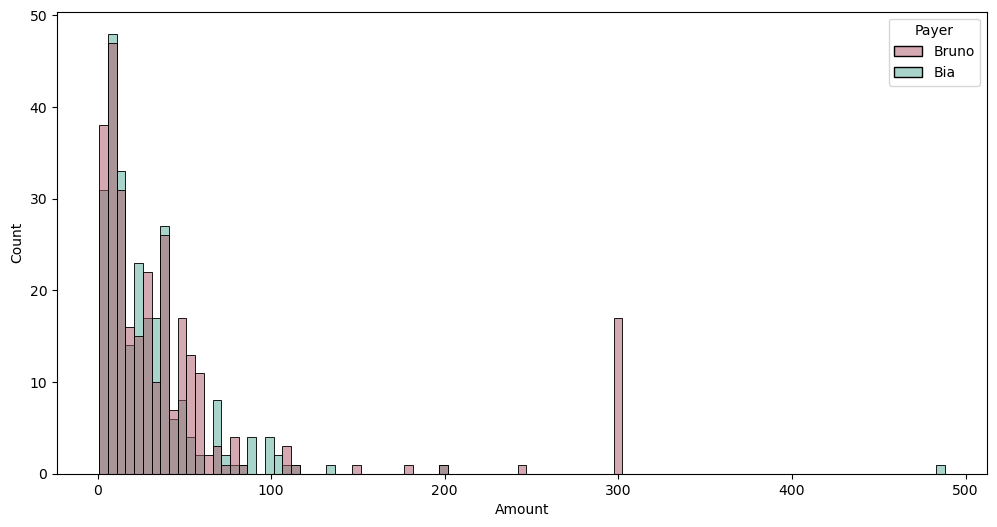

In [61]:
plt.figure(figsize=(12,6))

sns.histplot(data=df_eda, x='Amount',  hue='Payer', palette=palette, binwidth=5)
plt.show()

In [45]:
df_gb_payer = df_eda[['Category', 'Amount', 'Payer']].groupby(['Category','Payer']).Amount.agg(['sum', 'mean','median', 'count'])

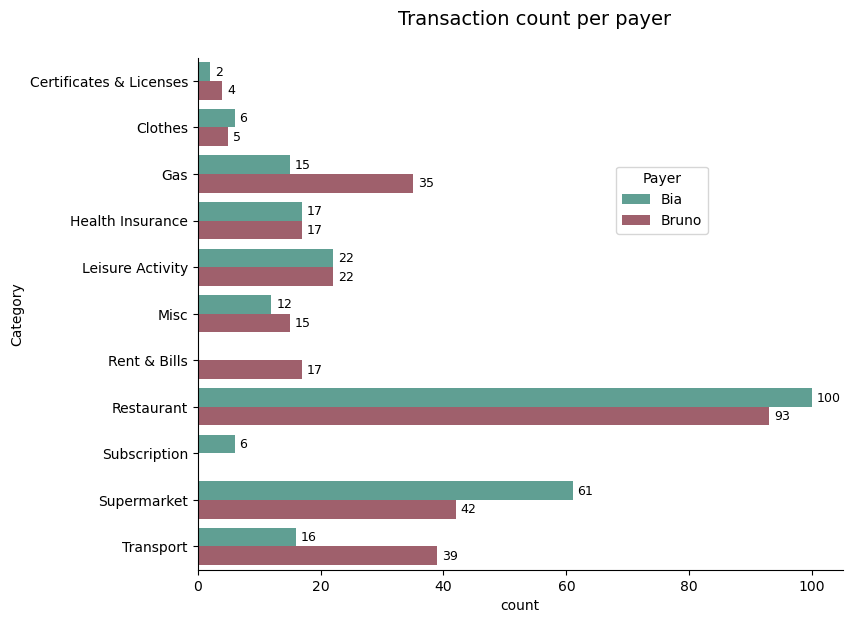

In [177]:
grid = sns.catplot(kind='bar', 
                 data=df_gb_payer, 
                 x='count', 
                 y='Category', 
                 hue='Payer', 
                 palette=palette                 
                  )

sns.move_legend(grid, 'upper right', bbox_to_anchor=(0.75, 0.8), frameon=True)
grid.fig.set_size_inches(w=15, h=6)

ax = grid.facet_axis(0,0)
for p in ax.patches[:-2:1]:
    ax.text(x=p.get_width()+0.8, y=p.get_y()+0.28, s=int(p.get_width()), fontsize=9)
    
plt.suptitle("Transaction count per payer", y=1.05, x=0.63, fontsize=14)
plt.show()

#### Key Insights from Payers:

- __Full Responsibility:__ Bia handles "Subscription" costs (all 6 transactions), while Bruno is solely responsible for "Rent & Bills" (all 17 transactions).
- __Shared Responsability:__ most categories are shared equally between Bia and Bruno. Bia paid for more Supermarket expenses, and Bruno took care of Gas and Transport more frequently. 

***

In [251]:
df_gb_mop = df_eda[['Category', 'Amount', 'Mode of Payment']].groupby(['Category','Mode of Payment']).Amount.agg(['sum', 'mean','median', 'count'])

In [252]:
mop_dict = {}

for cat in categories:
    mop_dict[cat] = list(df_gb_mop.loc[cat].index)

dict_NAB = dict(filter(lambda kv: kv[1] == ["NAB"], mop_dict.items()))
dict_Wise = dict(filter(lambda kv: kv[1] == ["Wise"], mop_dict.items()))
dict_both = dict(filter(lambda kv: kv[1] == ["NAB", "Wise"], mop_dict.items()))

percentage_mop = df_eda.groupby('Mode of Payment')['Amount'].count() / df_eda.shape[0]

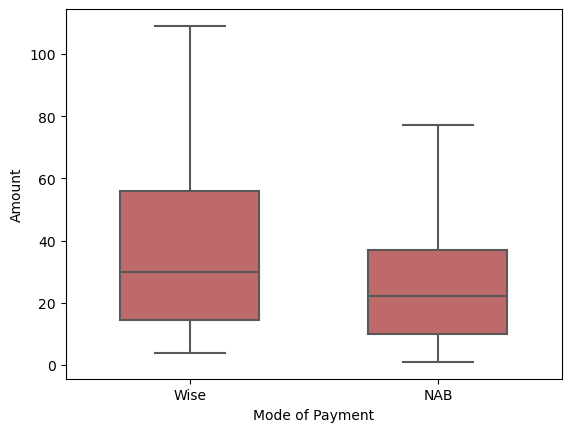

In [264]:
boxplot = sns.boxplot(y='Amount', x='Mode of Payment', data=df_eda,
                      gap=0.3, color='indianred', showfliers=False, linewidth=1.5)

In [258]:
df_eda[['Mode of Payment', 'Amount']].groupby('Mode of Payment').describe()

Amount                                                     \
                 count       mean        std  min      25%   50%      75%   
Mode of Payment                                                             
NAB              494.0  37.672733  59.180313  1.0   9.9000  22.1  37.0000   
Wise              52.0  44.829423  44.909100  3.9  14.5825  30.0  55.8275   

                         
                    max  
Mode of Payment          
NAB              487.97  
Wise             199.00

In [267]:
print("\n")

for p in range(len(percentage_mop)):
    print("Percentage of payments made through", "\033[1m", percentage_mop.index[p], ":", format(percentage_mop.iloc[p], ".2%"), "\033[0m")

print("\n")
print("\033[1mCategories paid ONLY through NAB:\033[0m", *list(dict_NAB.keys()), sep="\n  " )
print("\n")
print("\033[1mCategories paid ONLY through Wise:\033[0m", *list(dict_Wise.keys()), sep="\n  " )
print("\n")
print("\033[1mCategories paid through both NAB and Wise:\033[0m", *list(dict_both.keys()), sep="\n  " )



Percentage of payments made through  NAB : 90.48% 
Percentage of payments made through  Wise : 9.52% 


Categories paid ONLY through NAB:
  Rent & Bills
  Clothes
  Health Insurance
  Gas


Categories paid ONLY through Wise:
  Certificates & Licenses


Categories paid through both NAB and Wise:
  Supermarket
  Restaurant
  Transport
  Misc
  Leisure Activity
  Subscription


#### Key Insights from Mode of Payment:

NAB is the primary payment method, with 90.48% of all payments. Wise is used for specific purposes, like paying for Certificates and Licenses. On average, payments done with Wise are more expensive.  

***

### Feature Selection

The insights gleaned from EDA demonstrate that each available variable provides valuable information, justifying their incorporation into the model.<br>
From the 'Date' variable, we will engineer new features: '__Day of Week__' (0 to 6 - Monday to Sunday) and '__Weekday__' (boolean - 1 if it is a weekday, 0 if it is a weekend) to capture temporal patterns.

In [297]:
X = df_expenses.copy()
X['Day of Week'] = X['Date'].dt.dayofweek
X['Weekday'] = np.where(X['Day of Week'] < 5, 1, 0)

features = ['Day of Week', 'Weekday', 'Description', 'Payer', 'Mode of Payment', 'Amount']

y = pd.DataFrame(X.Category)
X = X[features]

Prior to the pre-processing stage - which will encompass ordinal encoding, TF-IDF vectorization, and standard scaling -, the dataset will be spli into training and testing sets to avoid data leakage.

In [350]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#y_train = y_train.values.reshape(-1,1)
#y_test = y_test.values.reshape(-1,1)

In [351]:
type(y_test)

pandas.core.frame.DataFrame

### Pre-Processing

The next step is to transform the data into a suitable format for training a machine learning model.<br>
First, the target variable ('Category') undergoes ordinal encoding.<br>
Second, a ColumnTransformer applies specific transformations to different input feature types: 
- ordinal encoding for binary categorical features
- TF-IDF vectorization for free text
- standard scaling for numerical features.
  
All these steps are done within a robust pipeline.

In [363]:
#Creating Pipeline

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

# Output
oe_target = OrdinalEncoder()
y_train = oe_target.fit_transform(y_train)
y_train = pd.DataFrame(y_train, columns=['Category'])

y_test = oe_target.transform(y_test)
y_test = pd.DataFrame(y_test, columns=['Category'])

# Inputs
bin_cat_columns = ['Payer', 'Mode of Payment']
free_text_columns = ['Description']
num_columns = ['Amount']

# PREPROCESSORS
bin_cat_pp = Pipeline([
    ('ordinal_enc', OrdinalEncoder())
                      ])

free_text_pp = Pipeline([
    ('tfidf', TfidfVectorizer())
                        ])

num_pp = Pipeline([
    ('scaler', StandardScaler())
                  ])

preprocessor = ColumnTransformer(
    [
        ('binary_categorical', bin_cat_pp, bin_cat_columns),
        ('free_text', free_text_pp, free_text_columns[0]),
        ('numerical', num_pp, num_columns)
    ]
                                )

### Model selection

In [364]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

dict_classifiers = {
    "DecisionTreeClassifier" : DecisionTreeClassifier(random_state=0),
    "SVC" : SVC(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "GBC": GradientBoostingClassifier(random_state=0),
    "RandomForest": RandomForestClassifier(random_state=0)
}

In [365]:
df_predictions = pd.DataFrame()
cm_dict = {}
accuracy_dict = {}
macro_precision_dict = {}

In [366]:
from sklearn.compose import make_column_selector
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings

warnings.filterwarnings("ignore")

# Testing models
for model, model_instantiation in dict_classifiers.items():
    
    pipeline = make_pipeline(preprocessor, model_instantiation)
    print ('\033[1m' + 'Fitting ' + model + '\033[0m')
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    df_predictions[model] = predictions 
    print ('Making predictions for model', model)
    
    cm = confusion_matrix(y_test, predictions)
    cm_dict.update({model:cm})
    print ('Confusion matrix calculated')

    accuracy = accuracy_score(y_test, predictions)
    accuracy_dict.update({model:accuracy})
    
    macro_precision = precision_score(y_test, predictions, average='macro')
    macro_precision_dict.update({model:macro_precision})
    print ('Accuracy and macro precision calculated')

    print (f"Accuracy: {accuracy:.4f} \nMacro precision: {macro_precision: .4f}")
    print ("Finished model", model, "\n")

Fitting DecisionTreeClassifier
Making predictions for model DecisionTreeClassifier
Confusion matrix calculated
Accuracy and macro precision calculated
Accuracy: 0.8182 
Macro precision:  0.7034
Finished model DecisionTreeClassifier 

Fitting SVC
Making predictions for model SVC
Confusion matrix calculated
Accuracy and macro precision calculated
Accuracy: 0.8242 
Macro precision:  0.7607
Finished model SVC 

Fitting KNN
Making predictions for model KNN
Confusion matrix calculated
Accuracy and macro precision calculated
Accuracy: 0.7636 
Macro precision:  0.5406
Finished model KNN 

Fitting GBC
Making predictions for model GBC
Confusion matrix calculated
Accuracy and macro precision calculated
Accuracy: 0.8667 
Macro precision:  0.9229
Finished model GBC 

Fitting RandomForest
Making predictions for model RandomForest
Confusion matrix calculated
Accuracy and macro precision calculated
Accuracy: 0.8485 
Macro precision:  0.8180
Finished model RandomForest 



In [356]:
from sklearn.compose import make_column_selector
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings

In [357]:
type(y_test), type(X_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_set['O quê?'])

In [204]:
vectorizer.vocabulary_

{'bupa': 41,
 'krispy': 158,
 'kreme': 157,
 'kare': 149,
 'chicken': 60,
 'chapter': 57,
 'gozleme': 130,
 'freemantle': 115,
 'coles': 70,
 'cookies': 75,
 'pro': 227,
 'bruno': 40,
 'urrando': 291,
 'de': 86,
 'fome': 109,
 'national': 197,
 'crime': 80,
 'check': 59,
 'gelato': 125,
 'messina': 183,
 'bp': 37,
 'beeliar': 24,
 'woolies': 301,
 'united': 290,
 'metro': 185,
 'vault': 294,
 'games': 121,
 'toast': 281,
 'face': 106,
 'grillah': 133,
 'red': 231,
 'rooster': 239,
 'aldi': 6,
 'car': 52,
 'park': 213,
 'mcdonald': 177,
 'sobremesas': 254,
 'sushihub': 273,
 'gasolina': 123,
 'reembolsável': 234,
 'aluguel': 9,
 'sushi': 271,
 'roll': 237,
 'fortitude': 113,
 'valley': 292,
 'puma': 228,
 'spar': 257,
 'morningside': 190,
 'grill': 132,
 'curry': 81,
 'gateway': 124,
 'the': 279,
 'coffee': 69,
 'connect': 73,
 'go': 127,
 'card': 53,
 'almoço': 8,
 'indiano': 144,
 'boost': 35,
 'hummingbird': 138,
 'café': 47,
 'mandurah': 174,
 'starbucks': 260,
 'curso': 82,
 'baris

In [205]:
train_set

,Data,E/S,O quê?,Variável,Cidade,Quem pagou/recebeu?,Como pagou/recebeu?,Valor
316,2023-02-22,S,Bupa,Plano de saúde,Brisbane,Bruno,NAB,36.53
154,2022-12-26,S,Krispy Kreme,Restaurante/Lanche,Brisbane,Bruno,NAB,15.35
126,2022-12-16,S,Kare Chicken - Chapter 3,Restaurante/Lanche,Brisbane,Bia,NAB,13.40
360,2023-03-18,S,Gozleme Freemantle,Restaurante/Lanche,Perth,Bia,NAB,15.25
535,2023-07-05,S,Coles - cookies pro Bruno Urrando de Fome,Mercado,Perth,Bia,NAB,3.50
...,...,...,...,...,...,...,...,...
71,2022-11-28,S,Pedágio - CarNextDoor,Transporte,Brisbane,Bruno,NAB,6.56
106,2022-12-10,S,SushiHub,Restaurante/Lanche,Brisbane,Bruno,NAB,23.20
270,2023-02-05,S,Gasolina Shell,Gasolina,Brisbane,Bruno,NAB,47.01
435,2023-04-29,S,Pizzaria Mack Daddy's,Restaurante/Lanche,Perth,Bruno,NAB,36.61


In [206]:
X_full = train_set.copy()

X_full['day_of_week'] = X_full['Data'].dt.dayofweek
X_full['weekday'] = np.where(X_full['day_of_week'] < 5, 1, 0)

drop_columns = ['E/S', 'Data', 'Cidade']
X_full.drop(drop_columns, axis=1, inplace=True)

In [207]:
y_train = X_full['Variável']
y_train = y_train.values.reshape(-1,1)

X_train = X_full.drop('Variável', axis=1)

In [208]:
from sklearn.preprocessing import OrdinalEncoder

oe_target = OrdinalEncoder()
y_train = oe_target.fit_transform(y_train)

In [209]:
y_train = pd.DataFrame(y_train, columns=['Variável'])

In [210]:
Xt_full = test_set.copy()

Xt_full['day_of_week'] = Xt_full['Data'].dt.dayofweek
Xt_full['weekday'] = np.where(Xt_full['day_of_week'] < 5, 1, 0)

Xt_full.drop(drop_columns, axis=1, inplace=True)

y_test = Xt_full['Variável']
y_test = y_test.values.reshape(-1,1)
X_test = Xt_full.drop('Variável', axis=1)

In [211]:
y_test = oe_target.transform(y_test)
y_test = pd.DataFrame(y_test, columns=['Variável'])

In [216]:
micro_recall_dict, macro_recall_dict

({'DecisionTreeClassifier': 0.7454545454545455,
  'SVC': 0.8848484848484849,
  'KNN': 0.7636363636363637,
  'GBC': 0.8727272727272727,
  'RandomForest': 0.7393939393939394},
 {'DecisionTreeClassifier': 0.6249873737373737,
  'SVC': 0.8287337662337663,
  'KNN': 0.6663131313131312,
  'GBC': 0.8341883116883118,
  'RandomForest': 0.5200378787878788})

In [217]:
micro_recall_dict.get('KNN')

0.7636363636363637

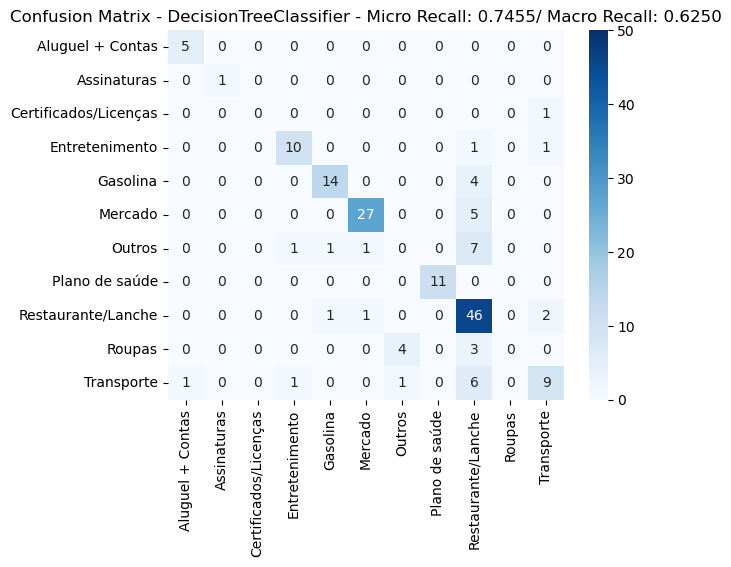

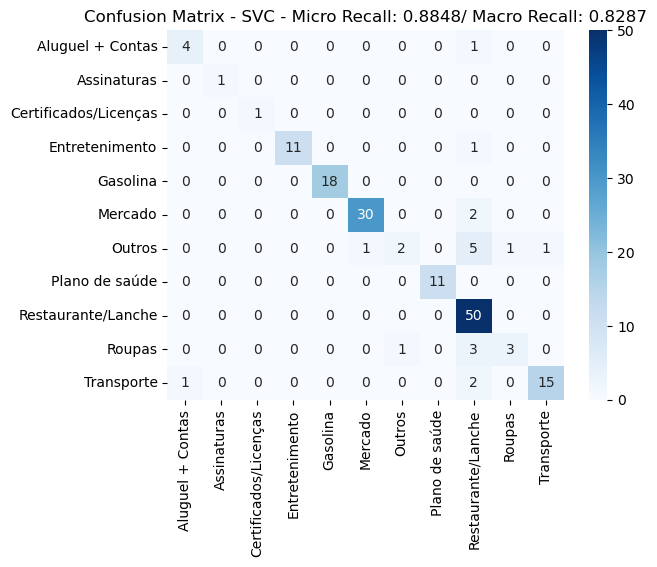

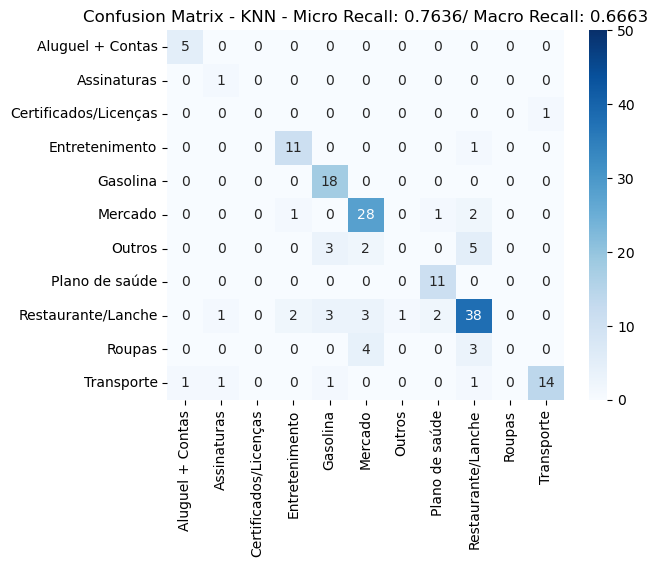

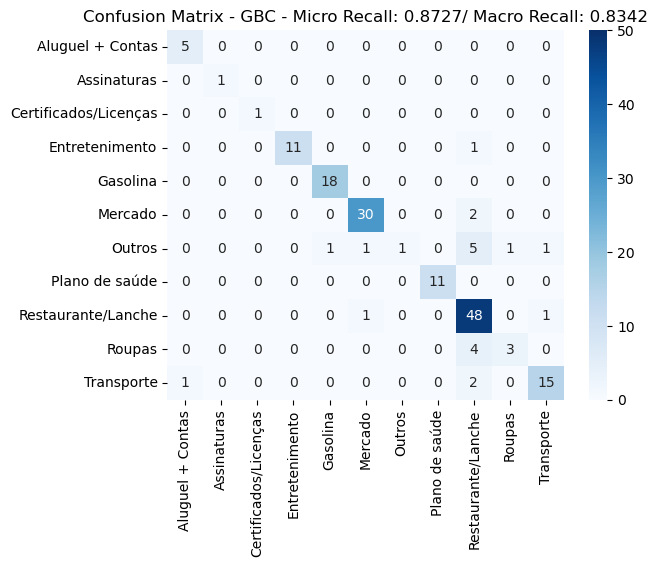

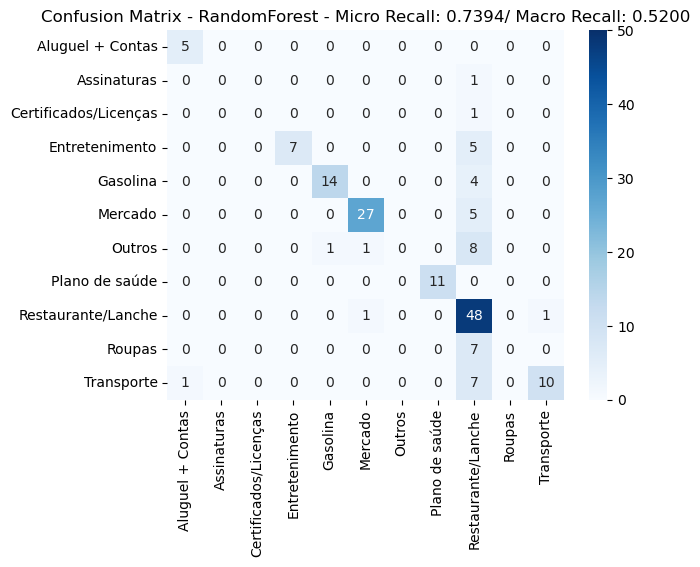

In [357]:
for model, cm in cm_dict.items():
    sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), vmax=50,
                xticklabels=oe_target.categories_[0], yticklabels=oe_target.categories_[0])
    micro = "{:.4f}".format(micro_recall_dict.get(model))
    macro = "{:.4f}".format(macro_recall_dict.get(model))
    plt.title("Confusion Matrix - " + model + ' - Micro Recall: ' + micro + '/ Macro Recall: ' + macro)
    plt.savefig(f"output_{model}.png", bbox_inches="tight")
    plt.show()

In [219]:
df_predictions.insert(0, 'Target', y_test)

In [220]:
all_correct = df_predictions[df_predictions.eq(df_predictions.iloc[:, 0], axis=0).all(axis=1)]

In [221]:
all_correct.shape[0] / df_predictions.shape[0]

0.6545454545454545

In [222]:
misclassified = df_predictions[~df_predictions.isin(all_correct)].dropna()

In [223]:
# ANALYSIS OF MISCLASSIFIES INSTANCES

df_misclass = X_test.copy()
df_misclass.insert(loc=0, column='row_number', value=np.arange(len(df_misclass)))

In [224]:
df_misclass = pd.merge(df_misclass, df_predictions, right_index=True, left_on='row_number')

In [225]:
condition = (df_misclass.Target != df_misclass.DecisionTreeClassifier) & (
             df_misclass.Target != df_misclass.SVC) & (
             df_misclass.Target != df_misclass.KNN) & (
             df_misclass.Target != df_misclass.GBC) & (
             df_misclass.Target != df_misclass.RandomForest)

In [226]:
oe_target.categories_

[array(['Aluguel + Contas', 'Assinaturas', 'Certificados/Licenças',
        'Entretenimento', 'Gasolina', 'Mercado', 'Outros',
        'Plano de saúde', 'Restaurante/Lanche', 'Roupas', 'Transporte'],
       dtype=object)]

In [227]:
df_misclass[condition].sort_values('Target')

,row_number,O quê?,Quem pagou/recebeu?,Como pagou/recebeu?,Valor,day_of_week,weekday,Target,DecisionTreeClassifier,SVC,KNN,GBC,RandomForest
104,19,Entrada - Eat Street,Bia,NAB,10.00,4,1,3.0,8.0,8.0,8.0,8.0,8.0
73,30,Loja de conveniência,Bruno,NAB,9.30,1,1,5.0,8.0,8.0,8.0,8.0,8.0
257,68,Mercado indiano,Bia,NAB,7.12,6,0,5.0,8.0,8.0,8.0,8.0,8.0
536,84,Souvenirs - João & avós,Bruno,NAB,13.85,4,1,6.0,8.0,8.0,8.0,8.0,8.0
153,104,Dymocks,Bruno,NAB,30.38,0,1,6.0,8.0,8.0,4.0,8.0,8.0
537,103,Ímãs,Bruno,NAB,15.00,4,1,6.0,8.0,8.0,8.0,8.0,8.0
261,94,Estacionamento City (reembolsado),Bruno,Wise,83.20,1,1,6.0,3.0,10.0,5.0,10.0,8.0
182,162,Kmart,Bruno,NAB,11.50,2,1,6.0,8.0,9.0,8.0,9.0,8.0
532,65,Big W - cartões & roubo de envelope,Bruno,NAB,16.98,2,1,6.0,8.0,8.0,8.0,8.0,8.0
534,50,Coles - presentes,Bia,NAB,25.40,2,1,6.0,5.0,5.0,5.0,5.0,5.0


In [228]:
df_misclass[(((df_misclass.Target != df_misclass.DecisionTreeClassifier) & (
              df_misclass.Target != df_misclass.RandomForest)) & (
              df_misclass.Target == df_misclass.KNN))].sort_values('Target')

,row_number,O quê?,Quem pagou/recebeu?,Como pagou/recebeu?,Valor,day_of_week,weekday,Target,DecisionTreeClassifier,SVC,KNN,GBC,RandomForest
174,163,Cricket - 2 ingressos,Bruno,Wise,50.30,6,0,3.0,10.0,3.0,3.0,3.0,8.0
462,38,United Petroleum,Bia,NAB,30.19,6,0,4.0,8.0,4.0,4.0,4.0,8.0
524,87,bp Spearwood,Bia,NAB,27.74,6,0,4.0,8.0,4.0,4.0,4.0,8.0
501,115,United Petroleum,Bruno,NAB,35.01,4,1,4.0,8.0,4.0,4.0,4.0,8.0
429,159,United Petroleum,Bia,NAB,50.04,6,0,4.0,8.0,4.0,4.0,4.0,8.0
495,141,NP Market,Bruno,NAB,2.99,0,1,5.0,8.0,5.0,5.0,5.0,8.0
377,153,Vietnamita East Vic Park,Bruno,NAB,32.87,0,1,8.0,10.0,8.0,8.0,10.0,10.0
290,96,Translink - GoCard em casa,Bia,NAB,7.10,0,1,10.0,8.0,10.0,10.0,10.0,8.0
195,99,GoCard,Bia,NAB,70.00,0,1,10.0,6.0,10.0,10.0,10.0,8.0
18,102,Go Card,Bia,Wise,30.00,5,0,10.0,8.0,10.0,10.0,10.0,8.0


Models chosen to move forward: SVC, GBC and KNN.<br>
SVC and GBC had the best performance by far.<br>
Random Forest predicted too many instances as category 8, which is also the most frequent one.<br>
Between DecisionTreeClassifier and KNN, KNN did not show any bias/"preferred class". The errors were scattered and different from the ones in SVC and GBC.<br>
It can bring new information, while DecisionTree will not.<br>
Also, DecisionTree had a very poor performance for category 10.

In [229]:
# GridSearch for GBC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

gbc_scoring= {
              'accuracy': make_scorer(accuracy_score),
              'precision': make_scorer(precision_score),
              'recall':make_scorer(recall_score)
             }


gbc_parameters = {
    "classifier__learning_rate": [0.05, 0.1, 0.15, 0.2],
    "classifier__max_depth":[6,7,8,9],
    "classifier__subsample":[0.8, 0.9, 1.0],
    "classifier__n_estimators":[100, 200, 300]
    }

gbc = GradientBoostingClassifier(verbose=1, random_state=42)
gbc_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', gbc)
                              ]
                       )

%timeit

gbc_gridsearch = GridSearchCV(gbc_pipeline,gbc_parameters,cv=2)
gbc_gridsearch.fit(X_train,y_train)
gbc_gridsearch.best_params_

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.4761           0.2691            3.14s
         2           1.2686           0.0788            3.05s
         3           1.1457           0.1659            2.92s
         4           1.0452           0.1562            3.45s
         5           0.9587           0.1171            3.53s
         6           0.8759           0.0576            3.46s
         7           0.8159           0.1125            3.49s
         8           0.7522           0.0595            3.46s
         9           0.6893           0.0309            3.36s
        10           0.6414           0.0782            3.30s
        20           0.3243           0.0188            2.78s
        30           0.1739           0.0134            2.47s
        40           0.1004           0.0066            2.13s
        50           0.0605          -0.0095            1.76s
        60           0.0393           0.0090            1.41s
       

KeyboardInterrupt: 

In [230]:
new_gbc_parameters = {
    "classifier__learning_rate": [0.01, 0.05, 0.1],
    "classifier__max_depth":[7,8,9,10],
    "classifier__subsample":[0.7,0.8, 0.9]
    }

new_gbc = GradientBoostingClassifier(verbose=1, random_state=42, n_estimators=100)
new_gbc_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', new_gbc)
                                  ])

new_gbc_gridsearch = GridSearchCV(new_gbc_pipeline,new_gbc_parameters,cv=2)
new_gbc_gridsearch.fit(X_train,y_train)
new_gbc_gridsearch.best_params_

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.8285           0.0585            2.31s
         2           1.6850          -0.1079            2.79s
         3           1.6318           0.0581            2.89s
         4           1.6389           0.1891            3.07s
         5           1.5948           0.0536            3.04s
         6           1.5571           0.0531            3.04s
         7           1.5381           0.0889            3.04s
         8           1.5154           0.0827            3.05s
         9           1.4393          -0.0523            3.02s
        10           1.4136           0.0584            2.98s
        20           1.1422           0.0427            2.96s
        30           0.9303           0.0226            2.74s
        40           0.7805           0.0108            2.36s
        50           0.6633          -0.0285            2.06s
        60           0.5723          -0.0072            1.67s
       

{'classifier__learning_rate': 0.05,
 'classifier__max_depth': 7,
 'classifier__subsample': 0.7}

In [231]:
new_gbc_gridsearch.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary_categorical',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder())]),
                                                  ['Quem pagou/recebeu?',
                                                   'Como pagou/recebeu?']),
                                                 ('free_text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'O quê?'),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Valor'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=7,
                                            random_state=42, subsample=0.7,
                                            verbose=1))])

In [232]:
#GridSearch for KNN

KNN_parameters = {
    'classifier__n_neighbors': (2, 3, 4, 5),
    'classifier__p': (1,2),
    'classifier__weights': ('uniform', 'distance'),
    'classifier__metric': ('minkowski', 'chebyshev', 'cosine', 'haversine'),
                 }

KNN = KNeighborsClassifier(algorithm='auto')
KNN_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNN)
                              ]
                       )

KNN_gridsearch = GridSearchCV(KNN_pipeline,KNN_parameters,cv=2)
KNN_gridsearch.fit(X_train,y_train)
KNN_gridsearch.best_params_

{'classifier__metric': 'minkowski',
 'classifier__n_neighbors': 2,
 'classifier__p': 2,
 'classifier__weights': 'distance'}

In [233]:
KNN_gridsearch.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary_categorical',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder())]),
                                                  ['Quem pagou/recebeu?',
                                                   'Como pagou/recebeu?']),
                                                 ('free_text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'O quê?'),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Valor'])])),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=2, weights='distance'))])

In [234]:
from sklearn.svm import SVC

SVC_parameters = {
    'classifier__C': [1, 2, 3, 4, 5], 
	'classifier__gamma': ['scale', 'auto'], 
	'classifier__kernel': ['rbf', 'linear'],
    'classifier__tol' : [0.0001, 0.001],
    'classifier__decision_function_shape': ['ovo', 'ovr']
    }

svc_model = SVC(random_state=42)
SVC_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', svc_model)
                              ]
                       )

SVC_gridsearch = GridSearchCV(SVC_pipeline,SVC_parameters,cv=2)
SVC_gridsearch.fit(X_train,y_train)
SVC_gridsearch.best_params_

{'classifier__C': 2,
 'classifier__decision_function_shape': 'ovo',
 'classifier__gamma': 'scale',
 'classifier__kernel': 'linear',
 'classifier__tol': 0.0001}

In [235]:
SVC_gridsearch.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary_categorical',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder())]),
                                                  ['Quem pagou/recebeu?',
                                                   'Como pagou/recebeu?']),
                                                 ('free_text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'O quê?'),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Valor'])])),
                ('classifier',
                 SVC(C=2, decision_function_shape='ovo', kernel='linear',
                     random_state=42, tol=0.0001))])

In [236]:
new_gbc_gridsearch.best_score_, KNN_gridsearch.best_score_, SVC_gridsearch.best_score_

(0.8850349040139616, 0.8485493019197208, 0.8955061082024433)

In [237]:
SVC_gridsearch.best_estimator_.predict(X_test)

array([10.,  4.,  8.,  8.,  4.,  5.,  8.,  7.,  3., 10.,  0.,  8.,  4.,
        8., 10.,  3.,  8.,  4.,  6.,  8.,  4.,  8.,  8.,  6.,  5.,  3.,
        8.,  8.,  5.,  8.,  8.,  8., 10.,  5.,  0.,  9.,  5.,  8.,  4.,
        4.,  4.,  8.,  7.,  3.,  5.,  5.,  7.,  5.,  8.,  5.,  5.,  5.,
        8.,  8.,  3.,  8.,  7.,  1.,  8.,  0.,  5.,  5.,  7.,  9., 10.,
        8.,  3.,  5.,  5.,  3.,  8.,  7.,  3.,  4.,  5.,  8.,  7.,  5.,
        8.,  8.,  4.,  5.,  8.,  7.,  8.,  4.,  2.,  4.,  4.,  0.,  5.,
        5.,  5.,  7., 10., 10., 10.,  8.,  8., 10.,  7.,  5., 10.,  8.,
        8.,  3.,  8., 10.,  8.,  8.,  8., 10.,  4.,  8., 10.,  4.,  8.,
        8.,  8.,  8.,  8.,  5.,  5.,  5.,  0.,  3.,  8.,  5.,  9.,  8.,
        8.,  8.,  4.,  8., 10.,  8., 10.,  5.,  8.,  8.,  4.,  5.,  8.,
        8., 10.,  8.,  8.,  5.,  8.,  8.,  5.,  8.,  8., 10.,  5.,  8.,
        8.,  5.,  6.,  4.,  0.,  5.,  9.,  3.,  7.])

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         1
         3.0       1.00      0.92      0.96        12
         4.0       1.00      1.00      1.00        18
         5.0       0.94      0.97      0.95        32
         6.0       0.67      0.20      0.31        10
         7.0       1.00      1.00      1.00        11
         8.0       0.80      0.96      0.87        50
         9.0       0.75      0.43      0.55         7
        10.0       0.88      0.83      0.86        18

    accuracy                           0.88       165
   macro avg       0.90      0.85      0.85       165
weighted avg       0.88      0.88      0.87       165



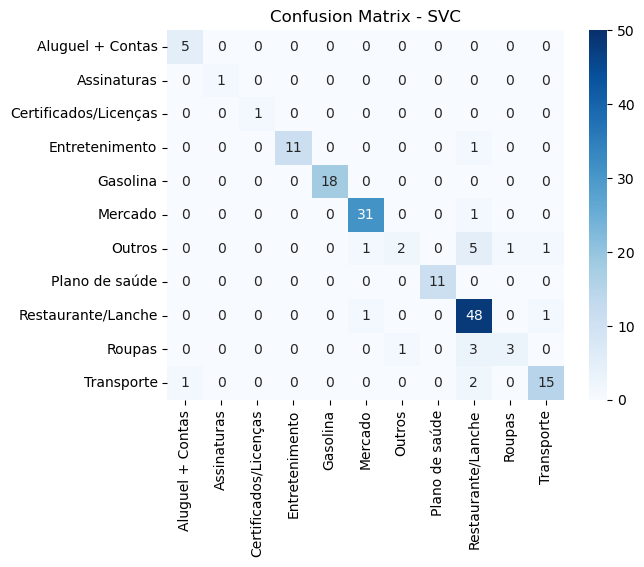

In [238]:
SVC_GS_predictions = SVC_gridsearch.best_estimator_.predict(X_test)
print(classification_report(y_test, SVC_GS_predictions))
cm = confusion_matrix(y_test, SVC_GS_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), vmax=50,
                xticklabels=oe_target.categories_[0], yticklabels=oe_target.categories_[0])
plt.title("Confusion Matrix - SVC")
plt.show()

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80         5
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         1
         3.0       0.85      0.92      0.88        12
         4.0       0.86      1.00      0.92        18
         5.0       0.84      0.97      0.90        32
         6.0       0.33      0.20      0.25        10
         7.0       1.00      1.00      1.00        11
         8.0       0.90      0.86      0.88        50
         9.0       0.67      0.57      0.62         7
        10.0       0.94      0.83      0.88        18

    accuracy                           0.85       165
   macro avg       0.83      0.83      0.83       165
weighted avg       0.84      0.85      0.85       165



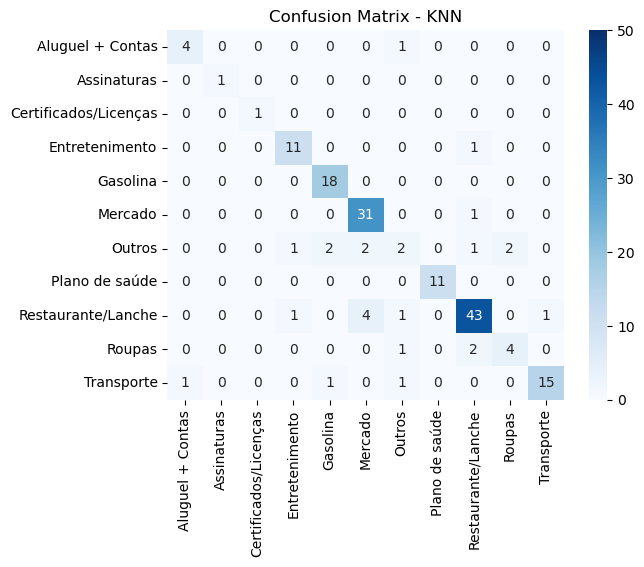

In [239]:
KNN_GS_predictions = KNN_gridsearch.best_estimator_.predict(X_test)
print(classification_report(y_test, KNN_GS_predictions))
cm = confusion_matrix(y_test, KNN_GS_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), vmax=50,
                xticklabels=oe_target.categories_[0], yticklabels=oe_target.categories_[0])
plt.title("Confusion Matrix - KNN")
plt.show()

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         1
         3.0       1.00      0.92      0.96        12
         4.0       0.94      0.94      0.94        18
         5.0       0.94      0.94      0.94        32
         6.0       0.50      0.10      0.17        10
         7.0       1.00      1.00      1.00        11
         8.0       0.77      0.96      0.86        50
         9.0       0.75      0.43      0.55         7
        10.0       0.88      0.83      0.86        18

    accuracy                           0.87       165
   macro avg       0.87      0.83      0.83       165
weighted avg       0.85      0.87      0.85       165



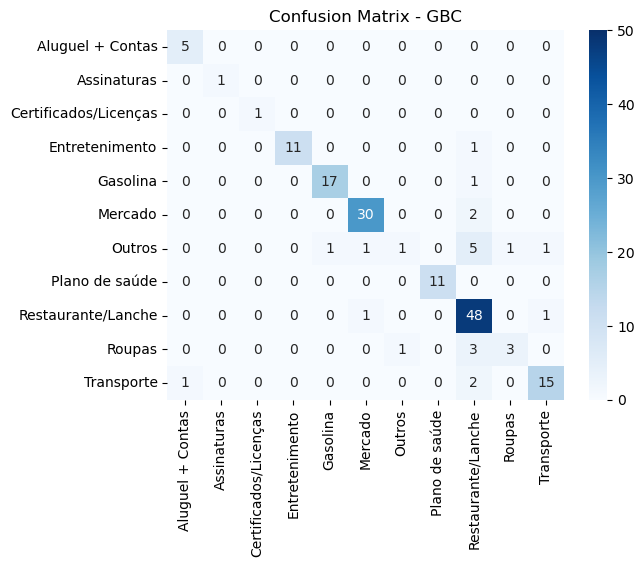

In [240]:
GBC_GS_predictions = new_gbc_gridsearch.best_estimator_.predict(X_test)
print(classification_report(y_test, GBC_GS_predictions))
cm = confusion_matrix(y_test, GBC_GS_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), vmax=50,
                xticklabels=oe_target.categories_[0], yticklabels=oe_target.categories_[0])
plt.title("Confusion Matrix - GBC")
plt.show()

Chosen model: SVC

In [241]:
df_jabiru

,Data,E/S,O quê?,Variável,Cidade,Quem pagou/recebeu?,Como pagou/recebeu?,Valor
26,2022-07-18,S,Loja de conveniência Posto Puma,NaN,Jabiru,Bruno,Wise,35.08
27,2022-07-19,S,Jabiru Foodland,NaN,Jabiru,Bruno,Wise,44.43
28,2022-07-21,S,Jabiru Foodland,NaN,Jabiru,Bruno,Wise,17.25
31,2022-07-23,S,Recepção do Croc,NaN,Jabiru,Bruno,Wise,5.25
32,2022-07-24,S,Café Marrawuddi,NaN,Jabiru,Bia,Wise,10.00
33,2022-07-25,S,Jabiru Foodland,NaN,Jabiru,Bia,Wise,65.89
34,2022-07-27,S,Bupa,NaN,Jabiru,Bruno,NAB,76.08
35,2022-07-27,S,Bupa,NaN,Jabiru,Bia,NAB,76.08
36,2022-07-28,S,Jabiru Foodland,NaN,Jabiru,Bia,Wise,13.92
37,2022-07-29,S,Recepção do Croc,NaN,Jabiru,Bia,Wise,4.10


In [291]:
X_jabiru = df_jabiru.copy()

X_jabiru['day_of_week'] = X_jabiru['Data'].dt.dayofweek
X_jabiru['weekday'] = np.where(X_jabiru['day_of_week'] < 5, 1, 0)

X_jabiru = X_jabiru[(X_jabiru['O quê?'] != 'Saque') & (X_jabiru['O quê?'] != 'Transferência')] 

X_jabiru.drop(drop_columns, axis=1, inplace=True)
X_jabiru.drop('Variável', axis=1, inplace=True)

In [292]:
SVC_result = SVC_gridsearch.best_estimator_.predict(X_jabiru)
SVC_result = oe_target.inverse_transform(SVC_result.reshape(-1, 1))

In [293]:
KNN_result = KNN_gridsearch.best_estimator_.predict(X_jabiru)
KNN_result = oe_target.inverse_transform(KNN_result.reshape(-1, 1))

In [294]:
GBC_result = new_gbc_gridsearch.best_estimator_.predict(X_jabiru)
GBC_result = oe_target.inverse_transform(GBC_result.reshape(-1, 1))

In [295]:
X_jabiru.reset_index(inplace=True)

In [296]:
X_jabiru['SVC'] = pd.DataFrame(SVC_result)
X_jabiru['KNN'] = pd.DataFrame(KNN_result)
X_jabiru['GBC'] = pd.DataFrame(GBC_result)

In [297]:
X_jabiru[(X_jabiru.KNN != X_jabiru.SVC)]

,index,O quê?,Quem pagou/recebeu?,Como pagou/recebeu?,Valor,day_of_week,weekday,SVC,KNN,GBC
0,26,Loja de conveniência Posto Puma,Bruno,Wise,35.08,0,1,Certificados/Licenças,Gasolina,Restaurante/Lanche
9,37,Recepção do Croc,Bia,Wise,4.10,4,1,Entretenimento,Outros,Outros
10,38,Recepção do Croc,Bia,Wise,3.50,6,0,Entretenimento,Outros,Outros
14,44,Anbinik,Bruno,Wise,61.00,6,0,Restaurante/Lanche,Mercado,Restaurante/Lanche
15,45,Loja de conveniência Posto Puma,Bia,Wise,10.65,6,0,Outros,Transporte,Restaurante/Lanche
17,47,Bebida Cooinda,Bia,Wise,10.50,6,0,Restaurante/Lanche,Transporte,Restaurante/Lanche
18,48,Jabiru Foodland,Bruno,Wise,90.03,0,1,Mercado,Outros,Mercado
34,74,Anbinik,Bruno,Wise,59.00,6,0,Restaurante/Lanche,Mercado,Restaurante/Lanche
35,75,Loja de conveniência Posto Puma,Bia,NAB,6.50,6,0,Outros,Mercado,Restaurante/Lanche
41,86,Ônibus para Darwin,Bia,Wise,55.55,5,0,Restaurante/Lanche,Transporte,Restaurante/Lanche


In [298]:
X_jabiru.set_index('index', inplace=True)

In [319]:
df_jabiru

,Data,E/S,O quê?,Variável,Cidade,Quem pagou/recebeu?,Como pagou/recebeu?,Valor
26,2022-07-18,S,Loja de conveniência Posto Puma,NaN,Jabiru,Bruno,Wise,35.08
27,2022-07-19,S,Jabiru Foodland,NaN,Jabiru,Bruno,Wise,44.43
28,2022-07-21,S,Jabiru Foodland,NaN,Jabiru,Bruno,Wise,17.25
31,2022-07-23,S,Recepção do Croc,NaN,Jabiru,Bruno,Wise,5.25
32,2022-07-24,S,Café Marrawuddi,NaN,Jabiru,Bia,Wise,10.00
33,2022-07-25,S,Jabiru Foodland,NaN,Jabiru,Bia,Wise,65.89
34,2022-07-27,S,Bupa,NaN,Jabiru,Bruno,NAB,76.08
35,2022-07-27,S,Bupa,NaN,Jabiru,Bia,NAB,76.08
36,2022-07-28,S,Jabiru Foodland,NaN,Jabiru,Bia,Wise,13.92
37,2022-07-29,S,Recepção do Croc,NaN,Jabiru,Bia,Wise,4.10


In [316]:
teste = X_jabiru[['SVC']]
teste.index.name = None

In [328]:
final_result = df_jabiru.join(teste, how='left')

In [330]:
final_result.drop('Variável', axis=1, inplace=True)
final_result.rename({'SVC':'Variável'}, axis=1, inplace=True)

In [335]:
final_result_name = 'Results_' + file_name
final_result.to_excel(os.path.join(path, final_result_name), index=False)

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
predictions = pipeline.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, predictions)

In [ ]:
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix")

print("Micro Recall:", recall_score(y_test, predictions, average='micro'))
print("Macro Recall:", recall_score(y_test, predictions, average='macro'))

In [ ]:
pipeline

Features to be added: day of the week, week day or weekend<br>
Columns to be dropped: ['E/S', 'O quê?', 'Data']<br>
Categorical columns: ['Variável', 'Cidade', 'Quem pagou/recebeu?', 'Como pagou/recebeu?']<br>
Column with labels to be predicted: 'Variável'

In [ ]:
df_expenses['day_of_week'] = df_expenses['Data'].dt.dayofweek

In [ ]:
df_expenses['weekday'] = np.where(df_expenses['day_of_week'] < 5, 1, 0)

In [ ]:
drop_columns = ['E/S', 'O quê?', 'Data']

df_expenses.drop( drop_columns, axis=1, inplace=True)

In [ ]:
#Ordinal Encoder: 
oe_columns = ['Cidade', 'Quem pagou/recebeu?', 'Como pagou/recebeu?', 'Variável']

In [ ]:
df_expenses_cat = df_expenses[oe_columns]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_expenses_cat = ordinal_encoder.fit_transform(df_expenses_cat[oe_columns])

In [ ]:
ordinal_encoder.categories_

In [ ]:
from sklearn.preprocessing import StandardScaler

num_columns = ['Valor']

scaler = StandardScaler()
df_expenses_num = scaler.fit_transform(df_expenses[num_columns])

In [ ]:
df_expenses_num.shape, df_expenses_cat.shape

In [ ]:
df_expenses_1 = pd.DataFrame(df_expenses_cat, columns=[oe_columns])

In [ ]:
df_expenses_2 = pd.DataFrame(df_expenses_num, columns=[num_columns])

In [ ]:
df_expenses_prepared = pd.concat([df_expenses_1, df_expenses_2], axis=1)
df_expenses_prepared.drop('Variável', axis=1, inplace=True)

df_expenses_target = df_expenses_1['Variável']

In [ ]:
pipeline

In [ ]:
test_set

In [ ]:
df_test = test_set.copy()

df_test['day_of_week'] = df_test['Data'].dt.dayofweek
df_test['weekday'] = np.where(df_test['day_of_week'] < 5, 1, 0)
df_test.drop(drop_columns, axis=1, inplace=True)

df_test_cat = ordinal_encoder.transform(df_test[oe_columns])
df_test_num = scaler.transform(df_test[num_columns])

df_test_1 = pd.DataFrame(df_test_cat, columns=[oe_columns])
df_test_2 = pd.DataFrame(df_test_num, columns=[num_columns])

df_test_prepared = pd.concat([df_test_1, df_test_2], axis=1)
df_test_prepared.drop('Variável', axis=1, inplace=True)

df_test_target = df_test_1['Variável']

In [ ]:
df_test_prepared

In [ ]:
df_test_target

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(max_depth = 10).fit(df_expenses_prepared, df_expenses_target)

In [ ]:
dtree_predictions = dtree_model.predict(df_test_prepared)

In [ ]:
cm = confusion_matrix(df_test_target, dtree_predictions)

In [ ]:
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix")

print("Micro Precision:", precision_score(df_test_target, dtree_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, dtree_predictions, average='micro'))

In [ ]:
from sklearn.metrics import precision_score, recall_score

macro_precision = precision_score(df_test_target, dtree_predictions, average='macro')
macro_recall = recall_score(df_test_target, dtree_predictions, average='macro')
micro_precision = precision_score(df_test_target, dtree_predictions, average='micro')
micro_recall = recall_score(df_test_target, dtree_predictions, average='micro')

print("Macro Precision:", macro_precision)
print("Macro Recall:", macro_recall)
print("Micro Precision:", micro_precision)
print("Micro Recall:", micro_recall)

In [ ]:
weighted_precision = precision_score(df_test_target, dtree_predictions, average='weighted')
weighted_recall = recall_score(df_test_target, dtree_predictions, average='weighted')

In [ ]:
print("Weighted Precision:", weighted_precision)
print("Weighted Recall:", weighted_recall)

In [ ]:
train_pred = dtree_model.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'rbf', C = 5).fit(df_expenses_prepared, df_expenses_target)
svm_predictions = svm_model_linear.predict(df_test_prepared)

# model accuracy for X_test  
accuracy = svm_model_linear.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

# creating a confusion matrix
cm = confusion_matrix(df_test_target, svm_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, svm_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, svm_predictions, average='micro'))

In [ ]:
train_pred = svm_model_linear.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5).fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = knn.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

knn_predictions = knn.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, knn_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, knn_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, knn_predictions, average='micro'))

In [ ]:
train_pred = knn.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=1, solver='lbfgs', multi_class='multinomial', max_iter=10000).fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = log_reg.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

log_reg_predictions = log_reg.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, log_reg_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, log_reg_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, log_reg_predictions, average='micro'))

In [ ]:
train_pred = log_reg.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0).fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = random_forest.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

random_forest_predictions = random_forest.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, random_forest_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, random_forest_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, random_forest_predictions, average='micro'))

In [ ]:
train_pred = random_forest.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)

gpc = GaussianProcessClassifier(kernel=kernel, random_state=0, multi_class='one_vs_rest').fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = gpc.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

gpc_predictions = gpc.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, gpc_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, gpc_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, gpc_predictions, average='micro'))

In [ ]:
train_pred = gpc.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier('squared_hinge', max_iter=10000, tol=0.00001).fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = sgdc.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

sgdc_predictions = sgdc.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, sgdc_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, sgdc_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, sgdc_predictions, average='micro'))

In [ ]:
train_pred = sgdc.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3, 
                                 random_state=0).fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = gbc.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

gbc_predictions = gbc.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, gbc_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, gbc_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, gbc_predictions, average='micro'))

In [ ]:
train_pred = gbc.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter=300, solver='lbfgs', activation='tanh').fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = mlp.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

mlp_predictions = mlp.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, mlp_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, mlp_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, mlp_predictions, average='micro'))

In [ ]:
train_pred = mlp.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bernoulli = BernoulliNB().fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = bernoulli.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

bernoulli_predictions = bernoulli.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, bernoulli_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, bernoulli_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, bernoulli_predictions, average='micro'))

In [ ]:
train_pred = bernoulli.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = LDA.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

LDA_predictions = LDA.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, LDA_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, LDA_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, LDA_predictions, average='micro'))

In [ ]:
train_pred = LDA.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.neighbors import NearestCentroid

centroid = NearestCentroid(metric='manhattan', shrink_threshold=2).fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = centroid.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

centroid_predictions = centroid.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, centroid_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, centroid_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, centroid_predictions, average='micro'))

In [ ]:
train_pred = centroid.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
model_list = []